### 1. 다중 클래스 분류(Multi-class Classification)
* 예측 확률함수 : 소프트맥스 함수(softmax function)
* 소프트맥스함수는 선택해야 하는 선택지의 총 갯수를 k라고 할 때, $k$차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정함

* $k$차원의 벡터에서 $i$번째 원소를 $z_i$ $i$번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의..

$$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$$

* $k=3$일때 소프트맥스 함수

$$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$$


https://wikidocs.net/images/page/35476/softmax1_final_final_ver.PNG

* 일반적으로 y값인 클래스를 나타낼때 원-핫 인코딩을 이용하나(무작위성을 갖는다는 장점이 있음), 단어의 유사성을 구현할 수 없다는 단점이 있음. 추후 논의

### 2. 비용함수(Cost function) : 또는 손실함수

* 소프트맥스 회귀에서는 비용함수로 크로스 엔트로피 함수 사용 : 이진분류와 동일..

$$cost = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$$

### 3. 소프트맥스 회귀 실습

#### 3-1. IRIS 데이터

In [2]:

%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import urllib.request

In [3]:
## 데이터 가져오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

('Iris.csv', <http.client.HTTPMessage at 0x24d6d741cd0>)

In [29]:
data = pd.read_csv('Iris.csv', encoding='latin1')
del data['Id']

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([X, y], axis=1)

In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
data.shape

(150, 5)

In [15]:
# 데이터의 품종 출력
print("품종 종류 :", data.Species.unique(), sep='\n')

품종 종류 :
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


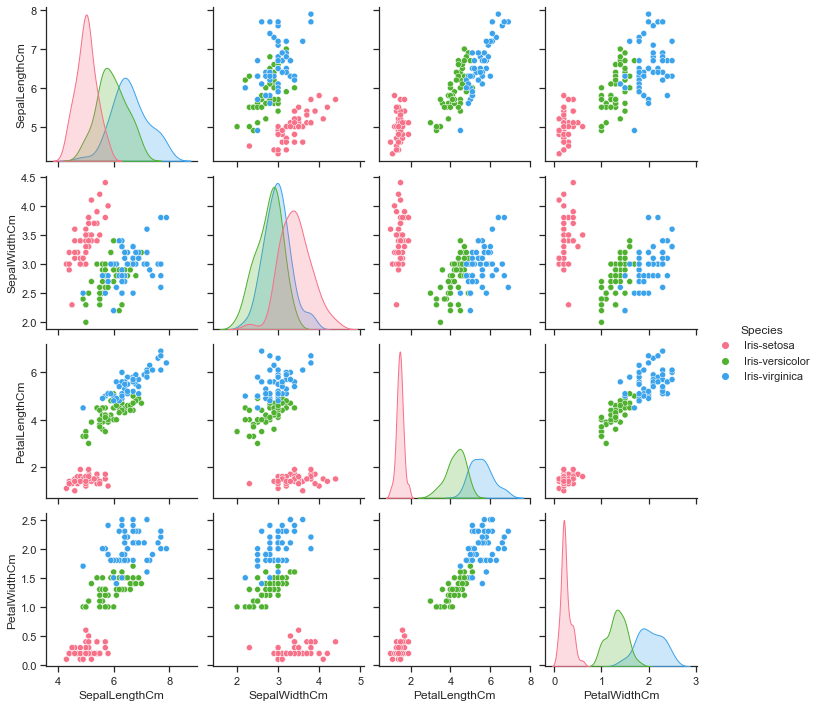

In [18]:
### 3개 품종별로 4개의 x 특성값이 어떻게 다른지 확인
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")
plt.show()

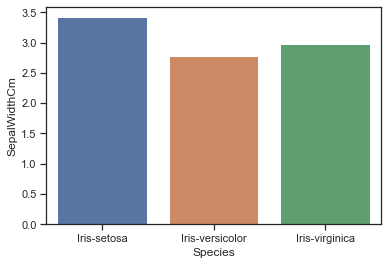

In [21]:
### 종과 4개 특성값 연관관계 확인
sns.barplot(data.Species, data.SepalWidthCm, ci=None)
plt.show()

<AxesSubplot:>

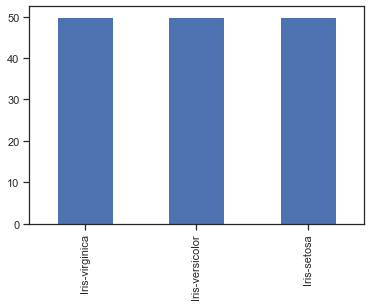

In [22]:
data.Species.value_counts().plot(kind='bar')

In [23]:
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

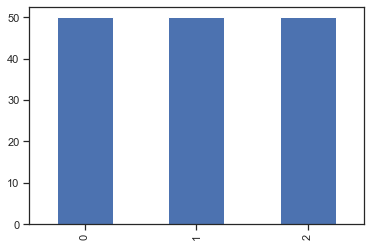

In [30]:
### 1. 소프트맥스 회귀모델 구성을 위한 전처리 : 우선 y값을 원핫인코딩 수행

# 먼저 정수로 변환
data.Species = data.Species.replace(['Iris-virginica','Iris-setosa','Iris-versicolor'], [0, 1, 2])

# 확인
data.Species.value_counts().plot(kind='bar')
plt.show()

In [31]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [32]:
# X_데이터, y 데이터 분류
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
data_y = data['Species'].values

In [33]:
print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [34]:
### 훈련데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1)

## 원 핫 인코딩

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [36]:
### 2. 모델 구성 : 입력 차원(x 변수)이 4개, 출력(y) 차원은 3

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [37]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))  # softmax 목적함수
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 4ms/step - loss: 2.9282 - accuracy: 0.3667 - val_loss: 2.9288 - val_accuracy: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 2.0002 - accuracy: 0.3333 - val_loss: 1.9448 - val_accuracy: 0.2000
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.6191 - accuracy: 0.1333 - val_loss: 1.5687 - val_accuracy: 0.1667
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.4531 - accuracy: 0.1000 - val_loss: 1.3883 - val_accuracy: 0.2000
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.3374 - accuracy: 0.1167 - val_loss: 1.2756 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2508 - accuracy: 0.0917 - val_loss: 1.1666 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 1.1729 - accuracy: 0.1167 - val_loss: 1.1080 - val_accuracy: 0.2333

Epoch 58/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7833 - val_loss: 0.3931 - val_accuracy: 0.8000
Epoch 59/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7917 - val_loss: 0.4054 - val_accuracy: 0.7667
Epoch 60/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8000 - val_loss: 0.4014 - val_accuracy: 0.7667
Epoch 61/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8250 - val_loss: 0.4013 - val_accuracy: 0.7667
Epoch 62/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8250 - val_loss: 0.4091 - val_accuracy: 0.7667
Epoch 63/200
120/120 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8083 - val_loss: 0.3794 - val_accuracy: 0.8333
Epoch 64/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8333 - val_loss: 0.3817 - val_accuracy:

Epoch 115/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9333 - val_loss: 0.2797 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9417 - val_loss: 0.2667 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2760 - accuracy: 0.9417 - val_loss: 0.2616 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9333 - val_loss: 0.2716 - val_accuracy: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2694 - accuracy: 0.9333 - val_loss: 0.2727 - val_accuracy: 0.9667
Epoch 120/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.9417 - val_loss: 0.2733 - val_accuracy: 0.9667
Epoch 121/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.9417 - val_loss: 0.2696 - val_ac

120/120 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9417 - val_loss: 0.2096 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9417 - val_loss: 0.2087 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9417 - val_loss: 0.2040 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9417 - val_loss: 0.2110 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9417 - val_loss: 0.2006 - val_accuracy: 0.9667
Epoch 176/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9417 - val_loss: 0.1974 - val_accuracy: 0.9667
Epoch 177/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.9417 - val_loss: 0.2057 - val_accuracy: 0.9667

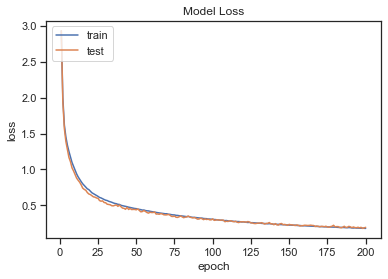

In [38]:
### accuracy 출력
epochs = range(1, 200+1)
plt.plot(epochs, history.history['loss'])  # 트레이닝 오차 값 
plt.plot(epochs, history.history['val_loss'])  # 테스트 오차값
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

* 모든 epoch에서 거의 일치하나, epoch이 증가할 수록 오차가 줄어듬

In [ ]:
print("\n 테스트 정확도: %4.5f" % )